In [ ]:
# Running a Random Forest as Baseline and for Feature Selection 

In [ ]:
# Data: MoH_Vote_Data_Long_Sorted.csv 
# Contains Donation Data by Disney and the rations of voting along party line in 5 categories over 4 sessios

In [84]:
import csv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Get Data
x = "~/Documents/GitHub/CampaignDonations/Output_Data/MoH_Vote_Data_Long_Sorted.csv"
df = pd.read_csv(x)
df.head()

,level_0,index,person,Year,wikidataid,sex,last,person_y,FirstName,first,...,religion,birthplace,disney_donations,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,disney_donations_lagMinus1,disney_donations_lagPlus1
0,0,0,4,2012,Q748066,male,Blumenauer,400033.0,Earl,Earl,...,0,"45.51667,-122.66667",0.0,0.000000,0.333333,0.333333,0.571429,0.666667,0.0,NaN
1,229,229,4,2014,Q748066,male,Blumenauer,400033.0,Earl,Earl,...,0,"45.51667,-122.66667",0.0,0.333333,0.800000,0.333333,0.400000,0.500000,0.0,0.0
2,458,458,4,2016,Q748066,male,Blumenauer,400033.0,Earl,Earl,...,0,"45.51667,-122.66667",0.0,0.400000,0.428571,0.222222,0.000000,0.000000,1000.0,0.0
3,687,687,4,2018,Q748066,male,Blumenauer,400033.0,Earl,Earl,...,0,"45.51667,-122.66667",1000.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.0
4,1,1,10,2012,Q1289889,male,Clyburn,400075.0,James,James,...,protestantism methodist,"33.92056,-80.34472",0.0,0.500000,0.500000,0.666667,0.571429,0.666667,2000.0,NaN


In [19]:
#df.columns.tolist()

In [5]:
# Clean Data
list = ["birthplace",'level_0',
 'index','wikidataid','last','person_y','FirstName','first',
 'death',
 'Number_Sessions_Served',
 'person_x',
 'party_x',
 'Session_114',
 'name',
 'birth',
 'party_y',
 'deathplace',
 'Session_116',
 'religion',    
 'ID_NameParty',
 'Session_113',
 'LastName',
 'pageid',
 'Session_115',
 'wikititle',
 'Pure_name',
 'name_y',
 'birthplace']

df = df.drop(columns = list)

# Get dummines for "character"-data

df = pd.get_dummies(df, columns = ['sex', 'Year', 'ethnicity', "party_short"])
df.head()


,person,disney_donations,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,disney_donations_lagMinus1,disney_donations_lagPlus1,sex_female,...,Year_2016,Year_2018,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_islander,ethnicity_native,ethnicity_white,party_short_D,party_short_R
0,4,0.0,0.000000,0.333333,0.333333,0.571429,0.666667,0.0,NaN,0,...,0,0,0,0,0,0,0,1,1,0
1,4,0.0,0.333333,0.800000,0.333333,0.400000,0.500000,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
2,4,0.0,0.400000,0.428571,0.222222,0.000000,0.000000,1000.0,0.0,0,...,1,0,0,0,0,0,0,1,1,0
3,4,1000.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.0,0,...,0,1,0,0,0,0,0,1,1,0
4,10,0.0,0.500000,0.500000,0.666667,0.571429,0.666667,2000.0,NaN,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
# Split Data into Train and Test Sets

#create a list of all unique IDs
ids=df
data_id=ids.drop_duplicates(subset='person')
data_id=data_id[['person']]
data_id.shape

(229, 1)

In [7]:
# Create new variable with random number between one and zero

np.random.seed(42)
data_id['data_use'] = (np.random.randint(0, 10000, data_id.shape[0]))/10000
data_id=data_id[['person', 'data_use']]
data_id.head()


,person,data_use
0,4,0.7270
4,10,0.0860
8,13,0.5390
12,15,0.5191
16,16,0.5734


In [8]:
# Assign each person to a modeling group training or testing 

data_id['MODELING_GROUP'] = np.where(((data_id.data_use <= 0.55)), 'TRAINING', 'TESTING')
data_id.head()

,person,data_use,MODELING_GROUP
0,4,0.7270,TESTING
4,10,0.0860,TRAINING
8,13,0.5390,TRAINING
12,15,0.5191,TRAINING
16,16,0.5734,TESTING


In [9]:
groups = data_id.groupby(['MODELING_GROUP'])['person'].count()
groups

MODELING_GROUP
TESTING     110
TRAINING    119
Name: person, dtype: int64

In [10]:

df=df.sort_values(by=['person'], ascending=[True])
data_id=data_id.sort_values(by=['person'], ascending=[True])
df_modelgroups =df.merge(data_id, on=['person'], how='inner')
df_modelgroups.head()

,person,disney_donations,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,disney_donations_lagMinus1,disney_donations_lagPlus1,sex_female,...,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_islander,ethnicity_native,ethnicity_white,party_short_D,party_short_R,data_use,MODELING_GROUP
0,4,0.0,0.000000,0.333333,0.333333,0.571429,0.666667,0.0,NaN,0,...,0,0,0,0,0,1,1,0,0.727,TESTING
1,4,0.0,0.333333,0.800000,0.333333,0.400000,0.500000,0.0,0.0,0,...,0,0,0,0,0,1,1,0,0.727,TESTING
2,4,0.0,0.400000,0.428571,0.222222,0.000000,0.000000,1000.0,0.0,0,...,0,0,0,0,0,1,1,0,0.727,TESTING
3,4,1000.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.0,0,...,0,0,0,0,0,1,1,0,0.727,TESTING
4,10,0.0,0.500000,0.500000,0.666667,0.571429,0.666667,2000.0,NaN,0,...,0,1,0,0,0,0,1,0,0.086,TRAINING


In [28]:

# Save Data-Set externally
#MoH_Vote_Data_Long_Sorted_CLEAN = df_modelgroups
#compression_opts = dict(method='zip',
#                        archive_name='MoH_Vote_Data_Long_Sorted_CLEAN.csv')  
#MoH_Vote_Data_Long_Sorted_CLEAN.to_csv('MoH_Vote_Data_Long_Sorted_CLEAN.zip', index=False,
#          compression=compression_opts)  


In [ ]:
# Implementing Random Forest 

In [ ]:
# Model 1: RandomForesetClassifier

In [11]:
# Preparing the data:

df_modelgroups["disney_donations_dummy"] = df_modelgroups["disney_donations_lagMinus1"]


#Create donation-change dummies

# 2 for increase in donations
# 1 for no change in donations
# 0 for decline in donations 

for x in range(len(df_modelgroups)):
    if df_modelgroups["disney_donations_dummy"].iloc[x] > df_modelgroups["disney_donations"].iloc[x]:  
        df_modelgroups["disney_donations_dummy"].iloc[x] = 2 
    elif  pd.isna(df_modelgroups["disney_donations_dummy"].iloc[x]) == True:
        df_modelgroups["disney_donations_dummy"].iloc[x] = df_modelgroups["disney_donations_dummy"].iloc[x] 
    elif  df_modelgroups["disney_donations_dummy"].iloc[x] < df_modelgroups["disney_donations"].iloc[x]:
        df_modelgroups["disney_donations_dummy"].iloc[x] = 0  
    else:
        df_modelgroups["disney_donations_dummy"].iloc[x] = 1
    
    
df_modelgroups.head()   

,person,disney_donations,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,disney_donations_lagMinus1,disney_donations_lagPlus1,sex_female,...,ethnicity_black,ethnicity_hispanic,ethnicity_islander,ethnicity_native,ethnicity_white,party_short_D,party_short_R,data_use,MODELING_GROUP,disney_donations_dummy
0,4,0.0,0.000000,0.333333,0.333333,0.571429,0.666667,0.0,NaN,0,...,0,0,0,0,1,1,0,0.727,TESTING,1.0
1,4,0.0,0.333333,0.800000,0.333333,0.400000,0.500000,0.0,0.0,0,...,0,0,0,0,1,1,0,0.727,TESTING,1.0
2,4,0.0,0.400000,0.428571,0.222222,0.000000,0.000000,1000.0,0.0,0,...,0,0,0,0,1,1,0,0.727,TESTING,2.0
3,4,1000.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.0,0,...,0,0,0,0,1,1,0,0.727,TESTING,NaN
4,10,0.0,0.500000,0.500000,0.666667,0.571429,0.666667,2000.0,NaN,0,...,1,0,0,0,0,1,0,0.086,TRAINING,2.0


In [12]:

df_modelgroups.disney_donations_dummy.value_counts()

1.0    500
2.0     94
0.0     93
Name: disney_donations_dummy, dtype: int64

In [13]:
from sklearn.ensemble import RandomForestClassifier


# Split dataset (prepare data for splitting)
list = ["person", "disney_donations", "disney_donations_lagMinus1", "disney_donations_lagPlus1", "data_use"]
df_modelgroups_split = df_modelgroups.drop(columns=list)

# Dropping all rows that contain "nan" in target-column
df_modelgroups_split= df_modelgroups_split[df_modelgroups_split["disney_donations_dummy"].notna()]
 
# Continue with Splitting
X_train = df_modelgroups_split[df_modelgroups_split["MODELING_GROUP"] == "TRAINING"]
y_train = X_train[["disney_donations_dummy"]]


X_test = df_modelgroups_split[df_modelgroups_split["MODELING_GROUP"] == "TESTING"]
y_test = X_test[["disney_donations_dummy"]]

X_train = X_train.drop(columns = ["MODELING_GROUP", "disney_donations_dummy"])
X_test = X_test.drop(columns = ["MODELING_GROUP", "disney_donations_dummy"])


In [14]:
X_train.head()

,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,sex_female,sex_male,Year_2012,Year_2014,Year_2016,Year_2018,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_islander,ethnicity_native,ethnicity_white,party_short_D,party_short_R
4,0.500000,0.500000,0.666667,0.571429,0.666667,0,1,1,0,0,0,0,1,0,0,0,0,1,0
5,0.666667,0.800000,0.333333,0.400000,0.500000,0,1,0,1,0,0,0,1,0,0,0,0,1,0
6,0.600000,0.285714,0.444444,0.250000,0.333333,0,1,0,0,1,0,0,1,0,0,0,0,1,0
8,0.250000,0.500000,0.666667,0.714286,0.666667,0,1,1,0,0,0,0,0,0,0,0,1,1,0
9,1.000000,0.800000,0.333333,0.400000,1.000000,0,1,0,1,0,0,0,0,0,0,0,1,1,0


In [37]:
np.random.seed(42)

rnd_clf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1)


In [38]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [39]:
# Get Feature Importance 

for name, score in zip(X_train.columns, rnd_clf.feature_importances_):
    print(name, score)

VoteAlongRatio_Film 0.18612845579152862
VoteAlongRatio_FS_IIR 0.1597448992617093
VoteAlongRatio_FS_FSS 0.13670081557233138
VoteAlongRatio_FS_CM 0.10540050158658731
VoteAlongRatio_FS_REB 0.13362922255752865
sex_female 0.038849960490667655
sex_male 0.03733205298534508
Year_2012 0.018186004340105585
Year_2014 0.01952498139382498
Year_2016 0.019419840761852866
Year_2018 0.0
ethnicity_asian 0.013517562571605121
ethnicity_black 0.031209568149420535
ethnicity_hispanic 0.025275535034714327
ethnicity_islander 0.0
ethnicity_native 0.0021916994952677444
ethnicity_white 0.03576120994530001
party_short_D 0.01875921922046803
party_short_R 0.018368470841742847


In [40]:
from sklearn.metrics import accuracy_score

y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

0.6696969696969697


In [23]:
# Get a better tuned model via feature tuning and CV-Grid Search 

# Code from: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rnd_clf_baseline = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_clf = RandomizedSearchCV(estimator = rnd_clf_baseline, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random_clf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [25]:
rf_random_clf.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [41]:

best_random_clf = rf_random_clf.best_estimator_
y_pred_random = best_random_clf.predict(X_test)

rnd_clf_baseline =  RandomForestClassifier(n_estimators = 10, random_state = 42)
rnd_clf_baseline.fit(X_train, y_train)
y_pred_baseline = rnd_clf_baseline.predict(X_test)

print(accuracy_score(y_test, y_pred_random))
print(accuracy_score(y_test, y_pred_baseline))


0.703030303030303
0.6424242424242425


In [142]:
df_modelgroups.head()

,person,Year,disney_donations,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,disney_donations_lagMinus1,disney_donations_lagPlus1,...,ethnicity_black,ethnicity_hispanic,ethnicity_islander,ethnicity_native,ethnicity_white,party_short_D,party_short_R,data_use,MODELING_GROUP,disney_donations_dummy
0,4,2012,0.0,0.000000,0.333333,0.333333,0.571429,0.666667,0.0,NaN,...,0,0,0,0,1,1,0,0.727,TESTING,1.0
1,4,2014,0.0,0.333333,0.800000,0.333333,0.400000,0.500000,0.0,0.0,...,0,0,0,0,1,1,0,0.727,TESTING,1.0
2,4,2016,0.0,0.400000,0.428571,0.222222,0.000000,0.000000,1000.0,0.0,...,0,0,0,0,1,1,0,0.727,TESTING,2.0
3,4,2018,1000.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.0,...,0,0,0,0,1,1,0,0.727,TESTING,NaN
4,10,2012,0.0,0.500000,0.500000,0.666667,0.571429,0.666667,2000.0,NaN,...,1,0,0,0,0,1,0,0.086,TRAINING,2.0


In [42]:
# Model 2: RandomForestRegressor

# Preparing the data:

df_modelgroups["disney_donations_difference"] = df_modelgroups["disney_donations_lagMinus1"] - df_modelgroups["disney_donations"]
  
# Dropping all rows that contain "nan" in target-column
df_modelgroups = df_modelgroups[df_modelgroups["disney_donations_difference"].notna()]
   
df_modelgroups.head()   



,person,disney_donations,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,disney_donations_lagMinus1,disney_donations_lagPlus1,sex_female,...,ethnicity_hispanic,ethnicity_islander,ethnicity_native,ethnicity_white,party_short_D,party_short_R,data_use,MODELING_GROUP,disney_donations_dummy,disney_donations_difference
0,4,0.0,0.000000,0.333333,0.333333,0.571429,0.666667,0.0,NaN,0,...,0,0,0,1,1,0,0.727,TESTING,1.0,0.0
1,4,0.0,0.333333,0.800000,0.333333,0.400000,0.500000,0.0,0.0,0,...,0,0,0,1,1,0,0.727,TESTING,1.0,0.0
2,4,0.0,0.400000,0.428571,0.222222,0.000000,0.000000,1000.0,0.0,0,...,0,0,0,1,1,0,0.727,TESTING,2.0,1000.0
4,10,0.0,0.500000,0.500000,0.666667,0.571429,0.666667,2000.0,NaN,0,...,0,0,0,0,1,0,0.086,TRAINING,2.0,2000.0
5,10,2000.0,0.666667,0.800000,0.333333,0.400000,0.500000,2000.0,0.0,0,...,0,0,0,0,1,0,0.086,TRAINING,1.0,0.0


In [43]:
# Split dataset (prepare data for splitting)
list = ["person", "disney_donations", "disney_donations_lagMinus1", "disney_donations_lagPlus1", "disney_donations_dummy", "data_use"]
df_modelgroups_split2 = df_modelgroups.drop(columns=list)


# Continue with Splitting
X_train = df_modelgroups_split2[df_modelgroups_split2["MODELING_GROUP"] == "TRAINING"]
y_train = X_train[["disney_donations_difference"]]


X_test = df_modelgroups_split2[df_modelgroups_split2["MODELING_GROUP"] == "TESTING"]
y_test = X_test[["disney_donations_difference"]]

X_train = X_train.drop(columns = ["MODELING_GROUP", "disney_donations_difference"])
X_test = X_test.drop(columns = ["MODELING_GROUP", "disney_donations_difference"])

X_train.head()

,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,sex_female,sex_male,Year_2012,Year_2014,Year_2016,Year_2018,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_islander,ethnicity_native,ethnicity_white,party_short_D,party_short_R
4,0.500000,0.500000,0.666667,0.571429,0.666667,0,1,1,0,0,0,0,1,0,0,0,0,1,0
5,0.666667,0.800000,0.333333,0.400000,0.500000,0,1,0,1,0,0,0,1,0,0,0,0,1,0
6,0.600000,0.285714,0.444444,0.250000,0.333333,0,1,0,0,1,0,0,1,0,0,0,0,1,0
8,0.250000,0.500000,0.666667,0.714286,0.666667,0,1,1,0,0,0,0,0,0,0,0,1,1,0
9,1.000000,0.800000,0.333333,0.400000,1.000000,0,1,0,1,0,0,0,0,0,0,0,1,1,0


In [52]:
from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)

rnd_reg = RandomForestRegressor(n_estimators = 500)

#n_estimators = 311, min_samples_split= 2, min_samples_leaf = 12, max_features = "sqrt", max_depth = 10, bootstrap = True)



print('Parameters currently in use:\n')
pprint(rnd_reg.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [53]:
rnd_reg.fit(X_train, y_train)


RandomForestRegressor(n_estimators=500)

In [54]:

y_pred = rnd_reg.predict(X_test)



In [55]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1249.932604493491
Mean Squared Error: 7637560.976119102
Root Mean Squared Error: 2763.613753063026


In [58]:
# Grid search for best tuned parameters: 
# Code taken from: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2 ,5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 8, 12]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [4, 8, 12],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [59]:
# Code taken from: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)

print(rf_random.best_params_)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 733, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [60]:

best_random = rf_random.best_estimator_
y_pred_random = best_random.predict(X_test)

rnd_reg_baseline = RandomForestRegressor(n_estimators = 500, random_state = 42)
rnd_reg_baseline.fit(X_train, y_train)
y_pred_baseline = rnd_reg_baseline.predict(X_test)


print('Mean Absolute Error Baseline:', metrics.mean_absolute_error(y_test, y_pred_baseline))
print('Mean Absolute Error Random Best:', metrics.mean_absolute_error(y_test, y_pred_random ))

print('Mean Squared Error Baseline:', metrics.mean_squared_error(y_test, y_pred_baseline))
print('Mean Squared Error Random Best:', metrics.mean_squared_error(y_test, y_pred_random ))

print('Root Mean Squared Error Baseline:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_baseline)))
print('Root Mean Squared Error Random Best:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_random )))




Mean Absolute Error Baseline: 1249.932604493491
Mean Absolute Error Random Best: 707.2442364954197
Mean Squared Error Baseline: 7637560.976119102
Mean Squared Error Random Best: 2167798.64161832
Root Mean Squared Error Baseline: 2763.613753063026
Root Mean Squared Error Random Best: 1472.3446069512122


In [128]:
# Get Feature Importance 

for name, score in zip(X_train.columns, best_random.feature_importances_):
    print(name, score)

VoteAlongRatio_Film 0.21221536491866594
VoteAlongRatio_FS_IIR 0.16303799525433862
VoteAlongRatio_FS_FSS 0.06977347269539091
VoteAlongRatio_FS_CM 0.11275208520273396
VoteAlongRatio_FS_REB 0.12932793082840213
sex_female 0.04044634922172626
sex_male 0.039985400587562635
Year_2012 0.02061605799701036
Year_2014 0.02502405713909497
Year_2016 0.04022874204565479
Year_2018 0.0
ethnicity_asian 0.0
ethnicity_black 0.02450219162168006
ethnicity_hispanic 0.0016426743275428286
ethnicity_islander 0.0
ethnicity_native 0.0
ethnicity_white 0.028120044755671512
party_short_D 0.04678792322884465
party_short_R 0.045539710175680335


In [142]:
# modeling routines from Scikit Learn packages
# import sklearn.linear_model
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLarsIC
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.neural_network import MLPRegressor
from sklearn.experimental import enable_hist_gradient_boosting # noqa from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity
# Sanity check: Echo output so that we know that this critical first chu nk has run successfully


In [76]:
#Code From: Introduction_to_machine_learning_with_code.pdf (boston simplified)

# Use GridSearchCV() to evaluate random forest regressors
param_grid = {"max_features": range(1, X_train.shape[1] + 1),
              "max_depth": range(1, X_train.shape[1] + 1)}
grid_search_forest = GridSearchCV(RandomForestRegressor(random_state = 42, n_estimators = 100),
param_grid, cv = 5, return_train_score = True)
#grid_search_forest.fit(X_train, y_train)
forest_depth = grid_search_forest.best_params_["max_depth"] 
forest_features = grid_search_forest.best_params_["max_features"]


In [94]:
#Code From: Introduction_to_machine_learning_with_code.pdf (boston simplified)
# Transfer GridSearchCV() results for Random Forest Regressor to a pandas DataFrame
forest_grid_search_results = pd.DataFrame(grid_search_forest.cv_results_)
forest_grid_search_results.loc[:, ["rank_test_score", "param_max_depth","param_max_features", "mean_test_score", "std_test_score"]]
#pd.sort_values(by = "rank_test_score").head(12)

,rank_test_score,param_max_depth,param_max_features,mean_test_score,std_test_score
0,4,1,1,-0.052124,0.045544
1,10,1,2,-0.055579,0.046706
2,1,1,3,-0.049983,0.041275
3,3,1,4,-0.051594,0.042171
4,9,1,5,-0.054650,0.044672
...,...,...,...,...,...
356,313,19,15,-2.295048,3.615617
357,333,19,16,-2.337076,3.748865
358,322,19,17,-2.313926,3.703551
359,356,19,18,-2.461559,3.961893


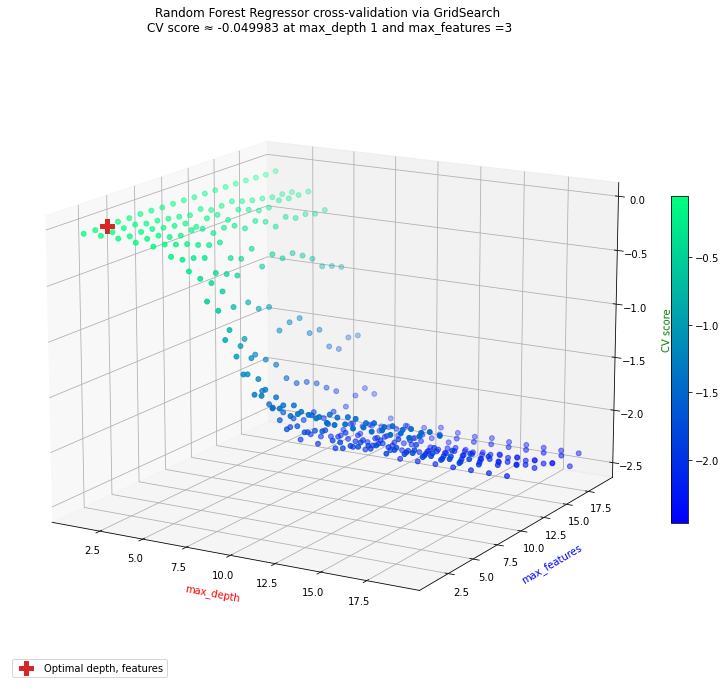

In [98]:
#Code From: Introduction_to_machine_learning_with_code.pdf (boston simplified)
import matplotlib.pyplot as plt
# Plot the optimization of Random Forest Regressors in 3D
fig = plt.figure(figsize = (14, 12))x
ax = fig.gca(projection = "3d")
plot3d_title = "Random Forest Regressor cross-validation via GridSearch \n"
plot3d_title += "CV score ≈ " + str(round(grid_search_forest.best_score_ , 6))
plot3d_title += " at max_depth " + str(forest_depth) + " and max_features =" + str(forest_features)
ax.set_title(plot3d_title)
ax.set_xlabel("\nmax_depth", color = "r") 
ax.set_ylabel("\nmax_features", color = "b")
ax.set_zlabel("\n\nCV score", color = "g")
temp_results = forest_grid_search_results.sort_values("mean_test_score", ascending = False).iloc[1:, :]
scatter = ax.scatter(temp_results["param_max_depth"], temp_results["param_max_features"],temp_results["mean_test_score"], c = temp_results["mean_test_score"], cmap = "winter", s = 24)
plt.colorbar(scatter, pad = 0.025, shrink = 0.5)
ax.scatter(forest_depth, forest_features, grid_search_forest.best_score_ , s = 200, marker = "P", color = "C3", label = "Optimal depth, features")
ax.legend(loc = "lower left")
ax.view_init(15, 300) # (25, 45) 
plt.savefig("DisneyRFRegressor_ GridSearchCV_hyperparameters.png")

In [144]:
# Let's implement the Random Forest Regressor model chosen by GridSearch


NameError: name 'CV' is not defined

In [145]:
forest_predictions = best_random.predict(X_test)
forest_weights = np.array(best_random.feature_importances_)


In [146]:
# Pie and doughnut plot ideas adapted freely from:
# https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
# Conditional labeling code:
# https://stackoverflow.com/questions/34035427/conditional-removal-of-labels-in-matplotlib-pie-chart/49753079
def format_autopct(pct):
    return ('%1.2f%%' % pct) if pct >= 2 else "*"

def format_labels(sizes, labels):
    new_labels = [label if size >= 0.02 else "*" for size, label in zip(sizes, labels)] 
    return new_labels

def restore_matplotlib_defaults(): 
    sns.reset_defaults() 
    rc_file_defaults() 
    plt.rcParams["figure.dpi"] = 72 
    return

In [172]:
def doughnut_plot_sorted_feature_importances(model, feature_names, file_name = "default"):
    n_features = len(model.feature_importances_)
    importances = model.feature_importances_
    sorted_index = np.argsort(importances)[::-1]
    pie_labels = np.array(feature_names)[sorted_index]
    #sns.set_palette("nipy_spectral_r", n_colors = n_features) 
    fig, ax = plt.subplots(figsize = (16, 17))
    ax.set_title("Model: " + str(model).partition("(")[0] + "\nSorted feature importances", fontsize = 20)
    ax.pie(importances[sorted_index], labeldistance = 1.04, pctdistance = 0.65,
           labels = format_labels(importances[sorted_index], pie_labels),
           startangle = 90,
           counterclock = False, autopct = format_autopct, 
           wedgeprops = dict(linewidth = 3, edgecolor = "white"), 
           textprops = dict(color = "black", size = 16)) 
    
    # weight = "bold",
    # ax.legend(pie_labels, title = "Features", loc = "center", title_fontsize = 14,
    #           facecolor = "lightcyan", fontsize = 12)
    
    
    # Center circle
    center_circle = plt.Circle((0, 0), 0.75, fc = "white")
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Create legend
    default_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"] 
    patches = []
    
        
    ax.legend(handles = patches, title = "Feature Importances", 
              loc = "center", facecolor = "white", 
              title_fontsize = 20, fontsize = 12)
        
        
    #Equal aspect, then show the whole plot
    ax.axis("equal")
    plt.tight_layout()


In [148]:
#boston_feature_names = ['CRIM','CRaIM','CRgIM','CRIgM','CRIgM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

boston_feature_names = X_train.columns.tolist()


['VoteAlongRatio_Film',
 'VoteAlongRatio_FS_IIR',
 'VoteAlongRatio_FS_FSS',
 'VoteAlongRatio_FS_CM',
 'VoteAlongRatio_FS_REB',
 'sex_female',
 'sex_male',
 'Year_2012',
 'Year_2014',
 'Year_2016',
 'Year_2018',
 'ethnicity_asian',
 'ethnicity_black',
 'ethnicity_hispanic',
 'ethnicity_islander',
 'ethnicity_native',
 'ethnicity_white',
 'party_short_D',
 'party_short_R']

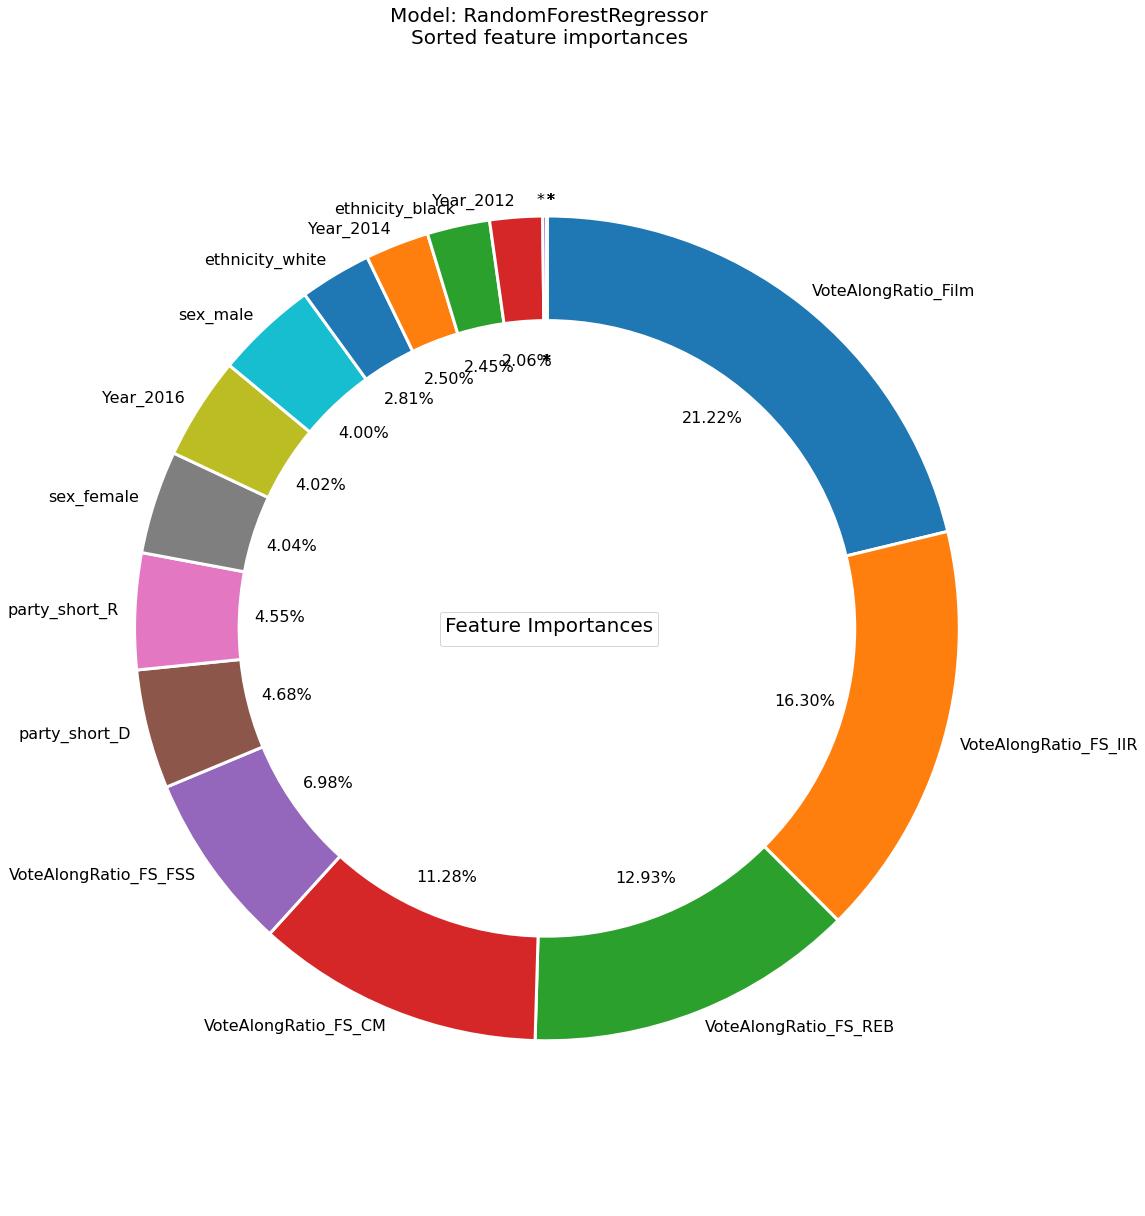

In [173]:
doughnut_plot_sorted_feature_importances(best_random, boston_feature_names, "forest")
#plt.savefig("Disney_Regression_bestrandom_sorted_feature_importances_doughnut.png")

<Figure size 432x288 with 0 Axes>